In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

import re
import jieba
import jieba.analyse
import jieba.posseg

import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
plt.style.use('fivethirtyeight')
import base64
import io
import codecs
from scipy.misc import imread

In [3]:
## 设置属性防止中文乱码
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 1000)
from matplotlib.font_manager import _rebuild
_rebuild()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True)  # 将科学计数法改为正常
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [4]:
from pandasql import sqldf, load_meat, load_births
pysqldf = lambda q: sqldf(q, globals())
def method_sql(df,sql):
    """在自定义函数内使用sql"""
    global g_df
    g_df = df  # 将局部变量传给全局变量，因为pysqldf找不到函数内的局部变量
    new_df = pysqldf(sql)
    return new_df

In [5]:
### 参数加载
input_file_path = 'dataset/input/'
output_file_path = 'dataset/output/'

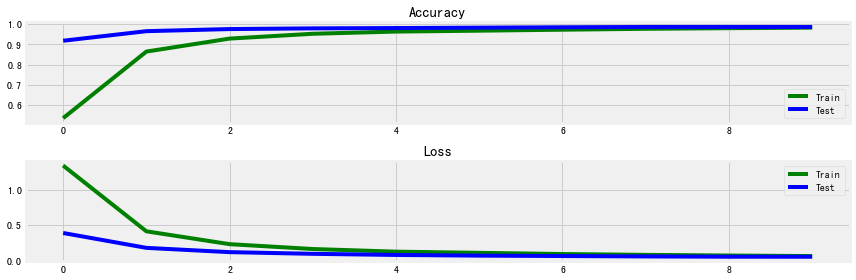

In [6]:
acc=  [0.53488650895140666, 0.8640505115089514, 0.92822890025575444, 0.95212595907928388, 0.96303548593350385, 0.96739130434782605, 0.97222666240409206, 0.97670236572890023, 0.97973945012787722, 0.98245684143222511]
val_acc=  [0.91761363636363635, 0.96496212121212122, 0.97537878787878785, 0.97885101010101006, 0.98042929292929293, 0.98232323232323238, 0.98421717171717171, 0.98579545454545459, 0.98579545454545459, 0.98579545454545459]
loss=  [1.3451852652118028, 0.41268307762339596, 0.23047648666097836, 0.16157411512397135, 0.12404196804551326, 0.10764243332145121, 0.090362812272723178, 0.078704521029322974, 0.069474372392445277, 0.061645033697554807]
val_loss=  [0.38888143108348655, 0.17798586633771357, 0.11730381631941507, 0.093457035551016976, 0.077389230584782184, 0.067965345659453155, 0.062185326323026056, 0.056450943065092268, 0.052413870479365944, 0.052114988032803691]


def huatu():

    import matplotlib
    plt.subplot(211)
    plt.title("Accuracy")
    plt.plot(acc, color="g", label="Train")
    plt.plot(val_acc, color="b", label="Test")
    plt.legend(loc="best")

    plt.subplot(212)
    plt.title("Loss")
    plt.plot(loss, color="g", label="Train")
    plt.plot(val_loss, color="b", label="Test")
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()
huatu()

$$ p(w1,w2,w3)=p(w1|w2,w3)*p(w2|w3) $$